In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
data = datasets.fetch_openml(
 'mnist_784', 
 version=1, 
 return_X_y=True
)

pixel_values, targets = data
targets = targets.astype(int)

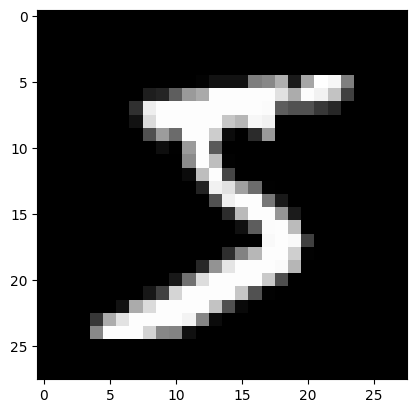

In [108]:
single_image = np.asarray(pixel_values.loc[0,:]).reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [72]:
targets[0]

5

In [73]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.loc[:3000, :])

In [74]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets.loc[:3000])), 
columns=["x", "y", "targets"]
)
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [78]:
tsne_df

,x,y,targets
0,19.947754,-11.476135,5.0
1,57.821465,0.287507,0.0
2,-0.242954,-55.192406,4.0
3,-42.470821,12.455335,1.0
4,-10.164596,-33.334820,9.0
...,...,...,...
2996,52.702972,-2.883296,0.0
2997,-30.432158,-13.406285,9.0
2998,-26.173521,46.746937,1.0
2999,11.100800,-24.422483,5.0


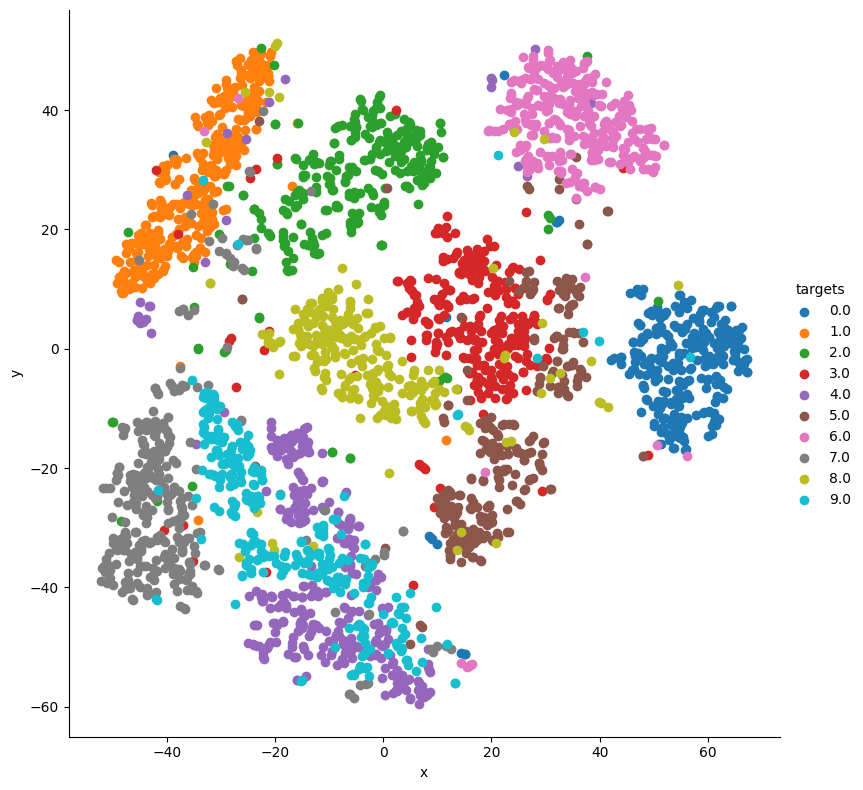

In [76]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

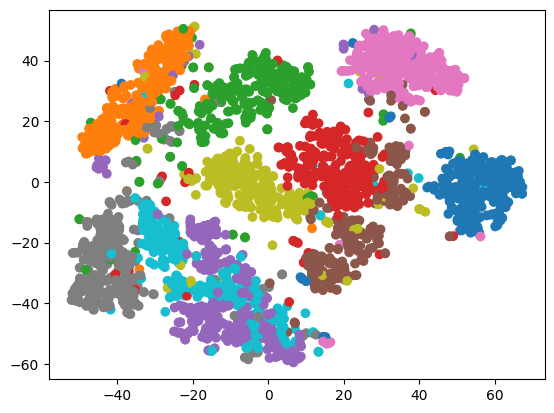

In [85]:
plt.scatter(tsne_df.x, tsne_df.y, c=tsne_df.targets, cmap='tab10', )

In [79]:
tsne_df[tsne_df["targets"]==0.0]

,x,y,targets
1,57.821465,0.287507,0.0
21,59.128410,-0.211937,0.0
34,53.883427,7.174884,0.0
37,54.810146,6.875791,0.0
51,54.606216,-5.382158,0.0
...,...,...,...
2952,60.750263,-12.907493,0.0
2955,56.159958,4.071183,0.0
2974,46.612053,-2.195829,0.0
2975,59.686207,2.606774,0.0


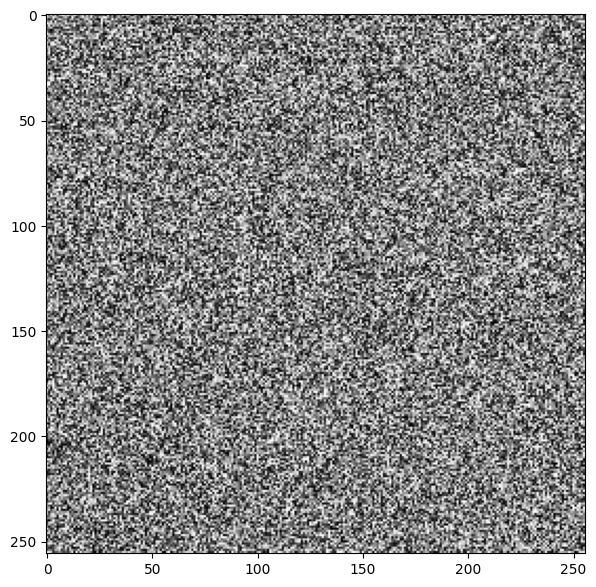

In [103]:
# generate random numpy array with values from 0 to 255
# and a size of 256x256
random_image = np.random.randint(0, 256, (256, 256))
# initialize plot
plt.figure(figsize=(7, 7))
# show grayscale image, nb: cmap, vmin and vmax
plt.imshow(random_image, cmap='gray', vmin=0, vmax=255)
plt.show()